# Federated Learning Case Study

## 03. A baseline ML models for comparison

We construct 3 baseline models (Decision Tree, MLP, XGB) using the pre-computed feature sets, for use with the CICIDS dataset.

## 1. Load in the data

In [1]:
import os
import pandas as pd
import numpy as np

X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

We now have our data in a typical ***X_train, X_test, y_train, y_test*** format, where we can then deploy centralised and decentralised ML models.

## 2. Centralised Machine Learning Models

### 2.1 Decision Tree Classifier

In [2]:
# https://www.section.io/engineering-education/machine-learning-with-xgboost-and-scikit-learn/

from sklearn.tree import DecisionTreeClassifier

In [3]:
%%time
dTree_clf = DecisionTreeClassifier()
dTree_clf.fit(X_train,y_train)

Wall time: 5min 3s


DecisionTreeClassifier()

In [4]:
dt_score = dTree_clf.score(X_test, y_test)
print("Accuracy of Model::", dt_score)

Accuracy of Model:: 0.9995404554015539


In [5]:
dt_predictions = dTree_clf.predict(X_test)

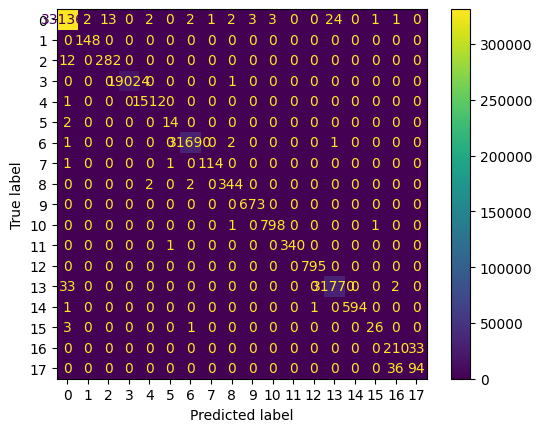

In [6]:
dt_predictions = dTree_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_cm = confusion_matrix(y_test, dt_predictions, labels=dTree_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dTree_clf.classes_)
disp.plot()
plt.show()

In [7]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, dt_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, dt_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, dt_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, dt_predictions, average=None, labels=np.unique(y_test)) )

Macro: (0.960593210702994, 0.9582498779983726, 0.9593448898878996, None)
Micro: (0.9995404554015539, 0.9995404554015539, 0.9995404554015539, None)
Weighted: (0.9995407702360778, 0.9995404554015539, 0.9995403821434363, None)
Per-label: (array([0.99983706, 0.98666667, 0.9559322 , 1.        , 0.99736148,
       0.875     , 0.99984225, 0.99130435, 0.98285714, 0.99556213,
       0.99625468, 1.        , 0.99874372, 0.99921371, 1.        ,
       0.92857143, 0.84337349, 0.74015748]), array([0.99983706, 1.        , 0.95918367, 0.99994744, 0.99933906,
       0.875     , 0.99987379, 0.98275862, 0.98850575, 1.        ,
       0.9975    , 0.99706745, 1.        , 0.99889954, 0.9966443 ,
       0.86666667, 0.86419753, 0.72307692]), array([0.99983706, 0.99328859, 0.95755518, 0.99997372, 0.99834929,
       0.875     , 0.99985802, 0.98701299, 0.98567335, 0.99777613,
       0.99687695, 0.99853157, 0.99937146, 0.9990566 , 0.99831933,
       0.89655172, 0.85365854, 0.73151751]), array([331414,    148,    

### 2.2 Multi Layer Perceptron

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
%%time
mlp_clf = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)
mlp_score = mlp_clf.score(X_test, y_test)

Wall time: 8min 9s


In [26]:
print("Accuracy of MLP model:", mlp_score)

Accuracy of MLP model: 0.9989502684815185


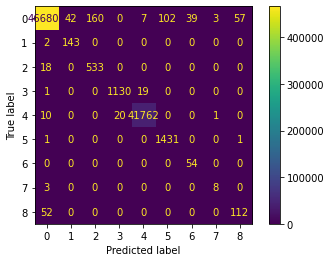

In [27]:
mlp_predictions = mlp_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp_cm = confusion_matrix(y_test, mlp_predictions, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

In [28]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, mlp_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, mlp_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, mlp_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, mlp_predictions, average=None, labels=np.unique(y_test)) )

Macro: (0.8181657848011369, 0.9270369222113148, 0.8634350204071762, None)
Micro: (0.9989502684815185, 0.9989502684815185, 0.9989502684815185, None)
Weighted: (0.9990813710240181, 0.9989502684815185, 0.9989908627850326, None)
Per-label: (array([0.99981366, 0.77297297, 0.76911977, 0.9826087 , 0.99937781,
       0.9334638 , 0.58064516, 0.66666667, 0.65882353]), array([0.99912245, 0.9862069 , 0.96733212, 0.9826087 , 0.99925825,
       0.99860433, 1.        , 0.72727273, 0.68292683]), array([0.99946794, 0.86666667, 0.85691318, 0.9826087 , 0.99931803,
       0.96493594, 0.73469388, 0.69565217, 0.67065868]), array([467211,    145,    551,   1150,  41793,   1433,     54,     11,
          164], dtype=int64))


In [29]:
print (len(mlp_clf.coefs_))
print (mlp_clf.coefs_[0].shape)
print (mlp_clf.coefs_[1].shape)
print (len(mlp_clf.intercepts_))
print (mlp_clf.intercepts_[0].shape)
print (mlp_clf.intercepts_[1].shape)
print (mlp_clf.n_layers_)
print (type(mlp_clf.coefs_[0]))

2
(84, 100)
(100, 9)
2
(100,)
(9,)
3
<class 'numpy.ndarray'>


### 2.3 Extreme Gradient Boosting

In [30]:
# https://www.geeksforgeeks.org/xgboost/
# https://www.section.io/engineering-education/machine-learning-with-xgboost-and-scikit-learn/

!pip install xgboost
import xgboost as xgb

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


In [31]:
%%time
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

Wall time: 46min 24s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [32]:
#predictions = xgb_classifier.predict(X_test)
#print("Accuracy of XGB Model::",accuracy_score(y_test,predictions))

xgb_score = xgb_classifier.score(X_test, y_test)
print("Accuracy of XGB model:", xgb_score)


Accuracy of XGB model: 0.9997600056193806


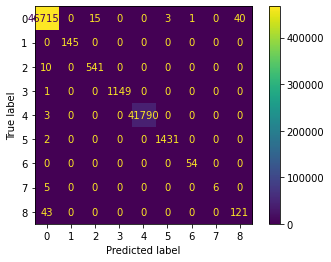

In [33]:
xgb_predictions = xgb_classifier.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
xgb_cm = confusion_matrix(y_test, xgb_predictions, labels=xgb_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_classifier.classes_)
disp.plot()
plt.show()

In [34]:
from sklearn.metrics import precision_recall_fscore_support
print ( "Macro:", precision_recall_fscore_support(y_test, xgb_predictions, average='macro') )
print ( "Micro:", precision_recall_fscore_support(y_test, xgb_predictions, average='micro') )
print ( "Weighted:", precision_recall_fscore_support(y_test, xgb_predictions, average='weighted') )
print ( "Per-label:", precision_recall_fscore_support(y_test, xgb_predictions, average=None, labels=np.unique(y_test)) )

Macro: (0.9671292808626253, 0.9180719223241771, 0.9351548208377614, None)
Micro: (0.9997600056193806, 0.9997600056193806, 0.9997600056193806, None)
Weighted: (0.9997588554204544, 0.9997600056193806, 0.9997579444086362, None)
Per-label: (array([0.99986302, 1.        , 0.97302158, 1.        , 1.        ,
       0.99790795, 0.98181818, 1.        , 0.7515528 ]), array([0.99987372, 1.        , 0.98185118, 0.99913043, 0.99992822,
       0.99860433, 1.        , 0.54545455, 0.73780488]), array([0.99986837, 1.        , 0.97741644, 0.99956503, 0.99996411,
       0.99825602, 0.99082569, 0.70588235, 0.74461538]), array([467211,    145,    551,   1150,  41793,   1433,     54,     11,
          164], dtype=int64))


### 2.4 Results

DecisionTree and XBG perform best - DT much faster, XGB gets a higher accuracy.

In [35]:
print (label.values)
print (label_n)
#label.value_counts()
print (np.unique(y_test))
print (np.unique(y_test, return_counts=True))

['BENIGN' 'BENIGN' 'BENIGN' ... 'BENIGN' 'BENIGN' 'BENIGN']
[0 0 0 ... 0 0 0]
[0 1 2 3 4 5 6 7 8]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([467211,    145,    551,   1150,  41793,   1433,     54,     11,
          164], dtype=int64))


In [ ]:
## Here we look at the number of instances across all classes, to determine what a naive BENIGN classifier would result in


counts = [567830, 489, 32006, 2573, 57531, 1375, 1449, 1984, 3, 9, 39701, 1474, 377, 5, 163]
counts[0] / np.sum(counts)

0.8031893901995703